<a href="https://colab.research.google.com/github/koalalovepabro/Kaggle-Study/blob/main/Dogs_vs_Cats_keras_%2304_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<h2 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:10px;text-align:center; font-weight: bold" >Hey Siri!! is it a Cat or Dog?</h2> 
<br> 
<br>
<div class = 'image'> <img style="float:center; border:10px solid #fed049; width:90%" align=center src = https://metro.co.uk/wp-content/uploads/2015/11/mg_dogorcat_comp.png> 
</div>
<br>
<br>
<a href ="https://metro.co.uk/wp-content/uploads/2015/11/mg_dogorcat_comp.png" style = "font-size:20px,color: dimgrey, text-align:left,font-family:serif">Image Source: can we guess if youre a cat  or dog person</a>
<br>


<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" > Hope you find this notebook helpful and enjoy going through this notebook...Thanks and Happy Reading...</p>

<a id = '0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Table of Contents</h2> 


*  [1. Introduction](#1.0)
*  [2. Initial Ground Work](#2.0)
*  [3. Data visualization](#3.0)
*  [4. Classification with Vanila CNN](#4.0)
*  [5. Data agumentaion, learning rate schedule, and Early stoping](#5.0)
*  [6. Classification with ResNet](#6.0)
*  [7. Final predictions on Test Set](#7.0)
*  [8. Summary](#8.0)


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >1. Introduction</h2> 

<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>Who doesn't love a cute cat and adorable dog? </strong></p>
These cute creatures are so addorable, and they reach all the way to computer vision compitions on kaggle. As humans we love our cute pets so much that, we can able to identify the speicis very easily, but can our computers able to do that without our help? 

Its kind of teach a machine to detect a thing in object. To teach which is cat? and which is dog? to computer we are going to build a deep learning model, which could be very basic to far complex based on our level of accuracy required and computational resources available. For this notebook, we are using a dogs and cats dataset, in which collection of images of dogs and cats and our objective is to build a basic CNN and classify dogs and cats from image, based on feature learning in hidden layers and activation maps in CNN. 

Whats the flow for this work? 
<ul><li> First, I will explore the dataset and attempt to make EDA of data</li>
    <li> later preprocess the data as requried, this includes image augumentations, scaling and what else need?</li>
    <li> Try to build a basic vanilla CNN, and try to predict species as a binary classification problem</li>
    <li> Later try to make predictions with transfer learning using ResNet50 and imagenet weights</li>
    <li> Finally compare the results on vanilla CNN and ResNet50 with sample data</li>
</ul>

<p style = "font-size: 30px; font-style: normal;color : #36609A;font-weight: bold" ><strong>Cute cute Dogs and cats </strong></p>


| | | |
|:-------------------------:|:-------------------------:|:-------------------------:|
|<img style="float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://i.insider.com/536aa78069bedddb13c60c3a?width=1000&format=jpeg&auto=webp">|<img style="float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://miro.medium.com/max/639/1*vg3kxX3H9eCNWKgBBeQHeA.jpeg">|<img style="float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://images.ctfassets.net/cnu0m8re1exe/7sLmeD1tcL4UoIm0BjNaLh/22a9f42a4315361db96470f50b178e86/Dog-and-Cat.jpg">|
|<img style = "float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://cdn.suwalls.com/wallpapers/animals/kitten-and-puppy-6928-1920x1200.jpg">|<img style = "float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://wallpaperaccess.com/full/1081184.jpg">|<img style = "float:center; border:10px solid #fed049; width: 550px; height : 200px" src="http://images4.fanpop.com/image/photos/16700000/Kittens-Puppies-teddybear64-16751426-1024-768.jpg">|
|<img style = "float:center; border:10px solid #fed049; width: 550px; height : 200px"  src="https://www.centrevillesquareanimalhospitalva.com/wp-content/uploads/2018/12/white_cat_and_dog.jpg">|<img style = "float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/09/12192216/Chihuahua-Kitten.jpg">|<img style = "float:center; border:10px solid #fed049; width: 550px; height : 200px" src="https://www.petbacker.com/blog/images/2017/dog-and-kitten.jpg">|

<br>
<a href ="https://www.google.com/search?q=dog+and+cat&rlz=1C1SQJL_enIN924IN924&sxsrf=ALeKk00fIZ8zlgT48DcdvzBb4Cvb5D4l1A:1621838427347&tbm=isch&source=iu&ictx=1&fir=BhriCENbREviAM%252CtgNZNGeRXuHXRM%252C_&vet=1&usg=AI4_-kQkz-AyFEDIX_UVuJZwrlUMfNCuMA&sa=X&ved=2ahUKEwjU3uD62uHwAhV35nMBHQ9YBRcQ9QF6BAgMEAE&biw=1536&bih=666#imgrc=lM_FAqlamnVj4M" style = "font-size:20px,color: dimgrey, text-align:left,font-family:serif">Images Source: Google.com</a>
<br>


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >2. Initial Ground Work</h2> 


<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >loading all the required libraries.....</p>

In [ ]:
# 출력문자 색상을 변경하는 클래스 생성
class color:
    BOLD = '\033[1m'
    BOLD_COLOR = '\033[1m' + '\033[93m'
    END = '\033[0m'



# loading libraries
print(color.BOLD + '\nImporting requreid libraries....\n'+ color.END)

import warnings 
warnings.filterwarnings('ignore')

# basic librareis
import zipfile
import glob
import os
import pandas as pd
import numpy as np
from PIL import Image


# plotting and visualizations
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import missingno as msno

# preprocessing
from keras.preprocessing.image import (ImageDataGenerator, 
                                       img_to_array, 
                                       array_to_img, 
                                       load_img)

from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import (confusion_matrix, 
                             classification_report, 
                             accuracy_score, 
                             f1_score, 
                             roc_auc_score)
# modeling
import tensorflow as tf
from keras.models import Model,Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten

from keras.applications import resnet50
from keras.applications.resnet50 import preprocess_input
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping,LearningRateScheduler


from keras import backend as K
K.clear_session()

# model plotting
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# mesc
from sklearn.utils import shuffle





print(color.BOLD_COLOR + 'Done!!!'+ color.END)



Importing requreid libraries....

Done!!!



<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Color paleete for this notebook...</p>

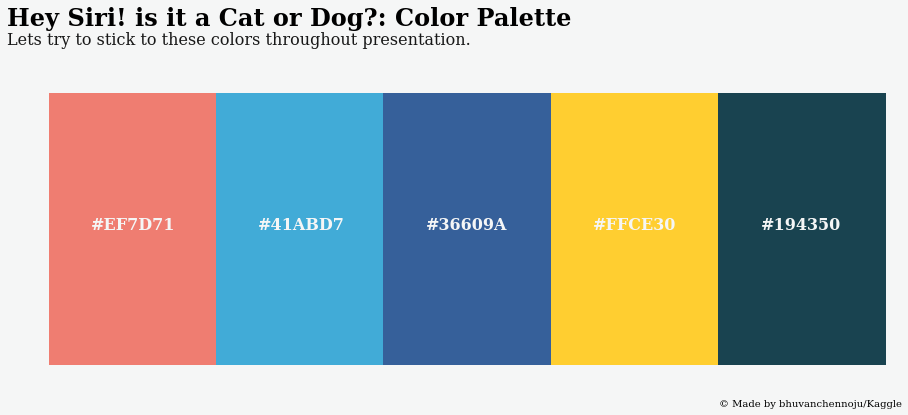

In [ ]:
# color palette
colors = ['#EF7D71','#41ABD7','#36609A','#FFCE30','#194350']
sns.palplot(colors,size = 3)

plt.gcf().set_size_inches(15,5)

plt.text(-0.75,-0.75, 'Hey Siri! is it a Cat or Dog?: Color Palette',{'fontfamily':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.68, 'Lets try to stick to these colors throughout presentation.',{'fontfamily':'serif', 'size':16},alpha = 0.9)
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'fontfamily':'serif', 'size':16, 'weight':'bold','color':'#f5f6f6'}, alpha =1)
plt.gcf().set_facecolor('#f5f6f6')
plt.box(None)
plt.axis('off')
plt.text(3.5,0.65,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.show()

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets Extract Labels from Image Names...</p>

In [ ]:
# extraction of train and test data from zipfiles to data folder
print('\n'+color.BOLD_COLOR + 'Extracting the data from dataset.....'+ color.END +'\n')

zip_files = glob.glob('/kaggle/input/dogs-vs-cats/*.zip') # 파일의 경로명을 이용해서, 파일들의 리스트를 뽑음

print('{} files found in the input directory'.format(color.BOLD + str(len(zip_files)) + color.END) +'\n')

for file in zip_files:
    with zipfile.ZipFile(file, 'r') as Z:
        Z.extractall('data')  # 압축풀기
    print ('{} is extracted'.format(color.BOLD + file.split('/')[-1] + color.END) + '\n')
      
print( color.BOLD_COLOR +'Extraction is completed'+ color.END +'\n')
    
  


Extracting the data from dataset.....

2 files found in the input directory

test1.zip is extracted

train.zip is extracted

Extraction is completed



In [ ]:
# Total number of images in train and test datasets

train_dir = '/kaggle/working/data/train/'
test_dir  = '/kaggle/working/data/test1/'

print(color.BOLD +"Total Images in Train, and Test Data..." +color.END)
print('\n' + color.BOLD_COLOR + 'No. of Train Images: '+ color.END + color.BOLD + str(len(os.listdir(train_dir))) + color.END)
print( color.BOLD_COLOR + 'No. of Test Images: ' + color.END + color.BOLD + str(len(os.listdir(test_dir))) + color.END + '\n')        

Total Images in Train, and Test Data...

No. of Train Images: 25000
No. of Test Images: 12500



In [ ]:
os.listdir(train_dir)

['cat.2877.jpg',
 'dog.2011.jpg',
 'cat.3647.jpg',
 'dog.7264.jpg',
 'dog.356.jpg',
 'cat.10063.jpg',
 'cat.6551.jpg',
 'dog.10644.jpg',
 'cat.4526.jpg',
 'dog.2043.jpg',
 'cat.11163.jpg',
 'dog.9249.jpg',
 'cat.433.jpg',
 'cat.8716.jpg',
 'cat.5371.jpg',
 'cat.10154.jpg',
 'cat.9714.jpg',
 'dog.3407.jpg',
 'dog.10945.jpg',
 'dog.11472.jpg',
 'dog.7082.jpg',
 'dog.6374.jpg',
 'cat.4411.jpg',
 'cat.10276.jpg',
 'cat.4534.jpg',
 'cat.8014.jpg',
 'cat.8711.jpg',
 'dog.279.jpg',
 'dog.1803.jpg',
 'dog.8424.jpg',
 'dog.9268.jpg',
 'dog.1884.jpg',
 'cat.1696.jpg',
 'dog.4375.jpg',
 'dog.3826.jpg',
 'cat.133.jpg',
 'cat.1133.jpg',
 'cat.5990.jpg',
 'dog.777.jpg',
 'dog.5513.jpg',
 'dog.11573.jpg',
 'cat.1461.jpg',
 'dog.10432.jpg',
 'cat.6568.jpg',
 'cat.2755.jpg',
 'dog.3093.jpg',
 'dog.5132.jpg',
 'cat.12170.jpg',
 'cat.6324.jpg',
 'dog.12297.jpg',
 'cat.7155.jpg',
 'cat.11973.jpg',
 'dog.935.jpg',
 'cat.4539.jpg',
 'dog.6995.jpg',
 'dog.3757.jpg',
 'dog.10017.jpg',
 'cat.10387.jpg',
 'cat.

In [ ]:
os.listdir(test_dir)

['8000.jpg',
 '1831.jpg',
 '918.jpg',
 '7077.jpg',
 '11036.jpg',
 '190.jpg',
 '3317.jpg',
 '6728.jpg',
 '3549.jpg',
 '8015.jpg',
 '4029.jpg',
 '847.jpg',
 '12310.jpg',
 '9512.jpg',
 '18.jpg',
 '7725.jpg',
 '5384.jpg',
 '5524.jpg',
 '7132.jpg',
 '1461.jpg',
 '4623.jpg',
 '2138.jpg',
 '9992.jpg',
 '7449.jpg',
 '6008.jpg',
 '5679.jpg',
 '720.jpg',
 '2475.jpg',
 '9269.jpg',
 '4216.jpg',
 '4469.jpg',
 '4954.jpg',
 '11376.jpg',
 '1879.jpg',
 '10546.jpg',
 '4356.jpg',
 '7240.jpg',
 '799.jpg',
 '7887.jpg',
 '7330.jpg',
 '4409.jpg',
 '5093.jpg',
 '10726.jpg',
 '12476.jpg',
 '11729.jpg',
 '3076.jpg',
 '5863.jpg',
 '6900.jpg',
 '9473.jpg',
 '11867.jpg',
 '913.jpg',
 '5487.jpg',
 '2783.jpg',
 '12071.jpg',
 '7687.jpg',
 '11144.jpg',
 '7347.jpg',
 '7795.jpg',
 '1549.jpg',
 '3638.jpg',
 '6832.jpg',
 '11655.jpg',
 '7350.jpg',
 '6224.jpg',
 '6791.jpg',
 '5559.jpg',
 '2015.jpg',
 '9221.jpg',
 '8292.jpg',
 '4071.jpg',
 '3220.jpg',
 '6361.jpg',
 '12391.jpg',
 '1464.jpg',
 '11344.jpg',
 '8791.jpg',
 '11646

In [ ]:
# category and filepath extraction helper functions

# category 뽑는 함수 
def category(path): 
    return [file.split('.')[0] for file in os.listdir(path)]

# filename 뽑는 함수 
def filename(path):
    return [file for file in os.listdir(path)]

# image names and labels
x_train_imgname = filename(train_dir) # train 파일명: 'dog.3967.jpg'
x_test_imgname = filename(test_dir)   # test 파일명: '6356.jpg'

y_train_label = category(train_dir)  # train 정답값: dog or cat

#creation of total dataframe and submission dataframe
print( '\n'+color.BOLD + 'Image data is storing into dataframes...'+ color.END + '\n')

train_image_df = pd.DataFrame({ 'filename': x_train_imgname, 'category': y_train_label}) # train용 데이터프레임
submission_image_df = pd.DataFrame({'filename': x_test_imgname})                         # test용 데이터프레임

print(color.BOLD +'Training image names and labels are read to '+ color.END + color.BOLD_COLOR +'train_image_df' + color.END + '\n')
print(color.BOLD +'Testing image names are read to '+ color.END + color.BOLD_COLOR + 'submission_image_df'+ color.END + '\n')




Image data is storing into dataframes...

Training image names and labels are read to train_image_df

Testing image names are read to submission_image_df



<a id = '3.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >3.Data visualization</h2> 

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets write helper funtions for path extraction and visualization of training images...</p>

In [ ]:
print(color.BOLD +'\n'+'Helper funtions for image path,id, category data extractions and Image visualizations' +'\n'+color.END)

# helper functions 
# 디렉터리에서 이미지의 "id, category, 경로"를 뽑아내는 함수 
def img_path(directory):
    ''' 
    This function extracts image ids, category,and image paths from directory.
    input:
    directiory: Path to location of images
    Return:
    ID_no: list of image ids
    Paths: list of image paths
    cate: list of category
    '''
    paths = []  # 경로
    cate = []   # category (dog or cat)
    ID_no = []  # id (만약 파일명이 'dog.3967.jpg'라면, ID_no에는 3967이 저장됨)
    
    for file in os.listdir(directory):
        path = os.path.join(directory, file)
        paths.append(path)
        cate.append(file.split('.')[0])
        ID_no.append(file.split('.')[1])
    return ID_no, paths, cate

# 데이터셋에서 이미지의 그리드를 생성해주는 함수
# 이미지는 shuffle되어서 랜덤으로 보여짐
def showImages(data, num_row = 3, num_col = 3, name = 'any', subtitle = 'off'):  # 기본값 설정
    """ This function creates a grid of images from  dataset.
    Shuffled images will be displayed.
    
    Input: 
    num_row: default: 3, no. of rows in a grid
    num_col: default:3, no. of columns in grid
    data: Dataframe of paths 
    name:  default 'any', takes: cat, dog, any or something else would give both
    subtitle: display id number for each image, defalult: 'off', takes: 'on' and 'off'
    Return: None
    
    """
    
    # little data sorting
    cat_df,dog_df = data[data['Category'] == 'cat'], data[data['Category'] == 'dog']

    
    if name == 'dog':
        X, Y  = dog_df['img_paths'], dog_df['ID_no'] 
    elif name == 'cat':
        X, Y  = cat_df['img_paths'], cat_df['ID_no']     
    else:
        X, Y  = data['img_paths'], data['ID_no']     # could use try and except but lets stick to minimal code

    (X_rand, Y_rand) = shuffle(X, Y)  # shuffle된 X와 Y를 랜덤으로 뽑아서 X_rand, Y_rand에 저장 
    
    
    # showing images on matplotlib 
    fig, ax = plt.subplots(num_row,num_col,figsize = (12,12), dpi = 100)  # dpi : Dot Per Inch. 인치당 dot(pixel)
    fig.patch.set_facecolor('#f5f6f6')  # facecolor를 #f5f6f6(white)로 설정
    axes = ax.ravel()  # 평탄화 (Flatten)
    
    for idx,ax  in enumerate(axes):  # axis에서 하나씩 idx와 ax에 인덱스 부여
        x = load_img(X_rand.iloc[idx],target_size= (125, 125)) # idx번째 X_rand 이미지를 x에 로드
        ax.imshow(x)                                           # ax위치에 x 출력
        
        if subtitle == 'on':
            ax.set_title("{}".format(Y_rand.iloc[idx]))
        else:
            ax.set_title('')
            
        ax.axis('off')
        plt.subplots_adjust(wspace =0)
    #fig.tight_layout()
    
    fig.text(0.1,0.93, 'Hey Siri! is it a Cat or Dog?: {}s from Training Data'.format(name.capitalize()),{'fontfamily':'serif','size':18,'weight':'bold'})
    
    return None



Helper funtions for image path,id, category data extractions and Image visualizations



In [ ]:
# Implementing above function over train data set
ID_no, img_paths, train_images = img_path(train_dir)

print('\n'+color.BOLD_COLOR + 'Dataframe is creating for training image visualization in a grid...' + color.END+'\n' )

#creating new dataframe for data visulaization
visual_df = pd.DataFrame({'ID_no':ID_no,'Category':train_images, 'img_paths': img_paths})

print(color.BOLD );print(visual_df.head(5))

print('\n'+color.BOLD_COLOR +'Done!'+color.END + '\n')


Dataframe is creating for training image visualization in a grid...


  ID_no Category                                img_paths
0  2877      cat  /kaggle/working/data/train/cat.2877.jpg
1  2011      dog  /kaggle/working/data/train/dog.2011.jpg
2  3647      cat  /kaggle/working/data/train/cat.3647.jpg
3  7264      dog  /kaggle/working/data/train/dog.7264.jpg
4   356      dog   /kaggle/working/data/train/dog.356.jpg

Done!



<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets see the images from training images...</p>

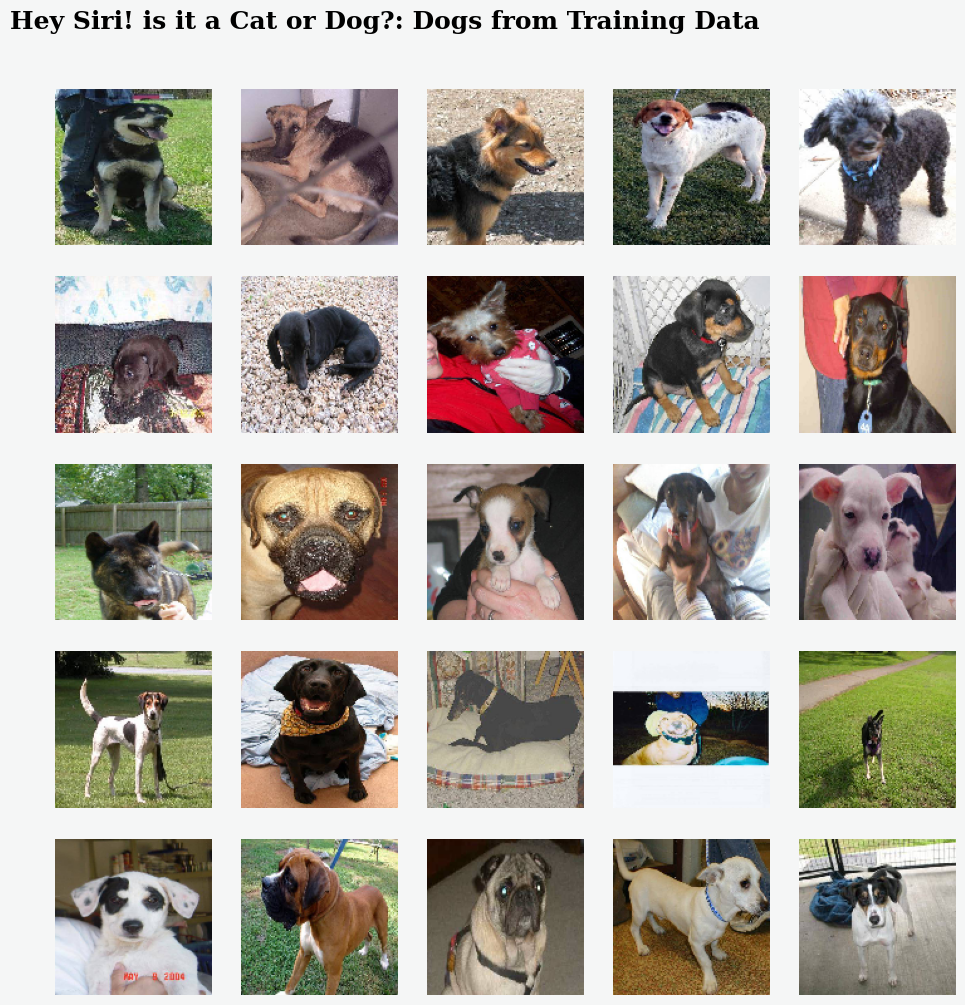

In [ ]:
showImages(visual_df,5,5, name = 'dog', subtitle = 'off')

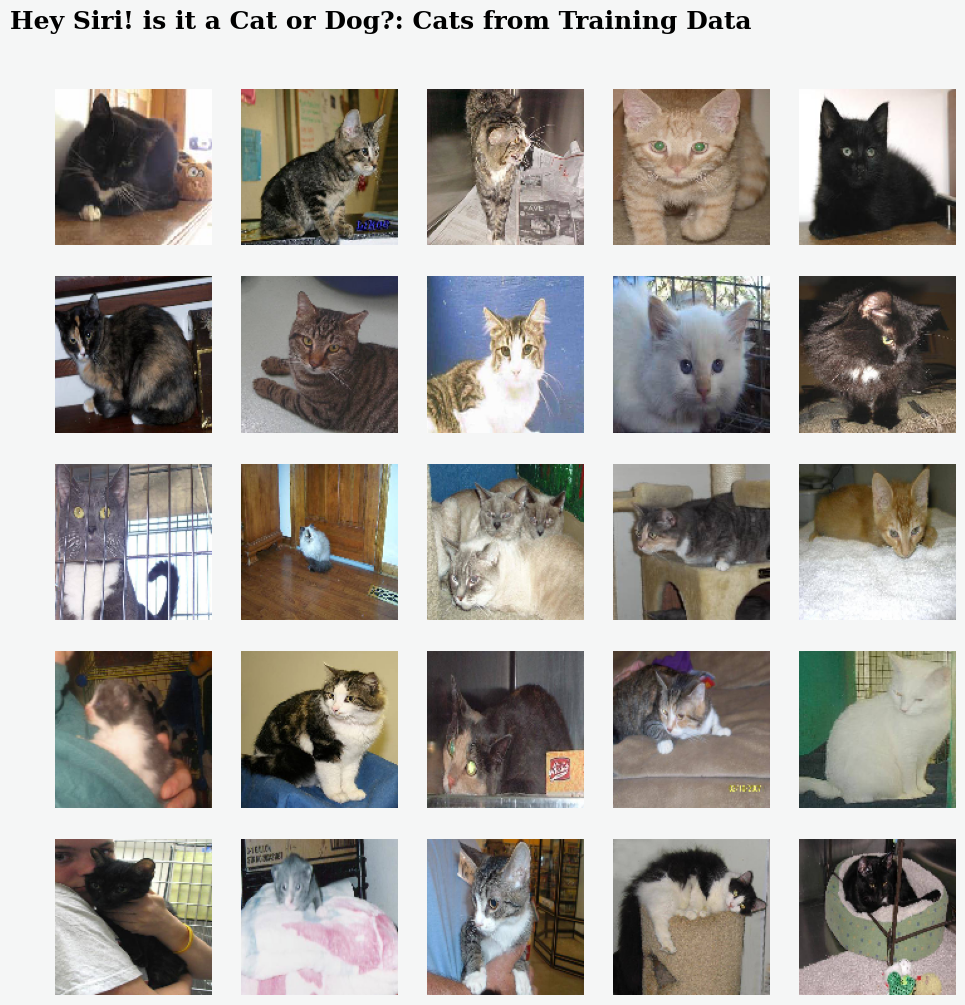

In [ ]:
showImages(visual_df,5,5, name = 'cat', subtitle = 'off')

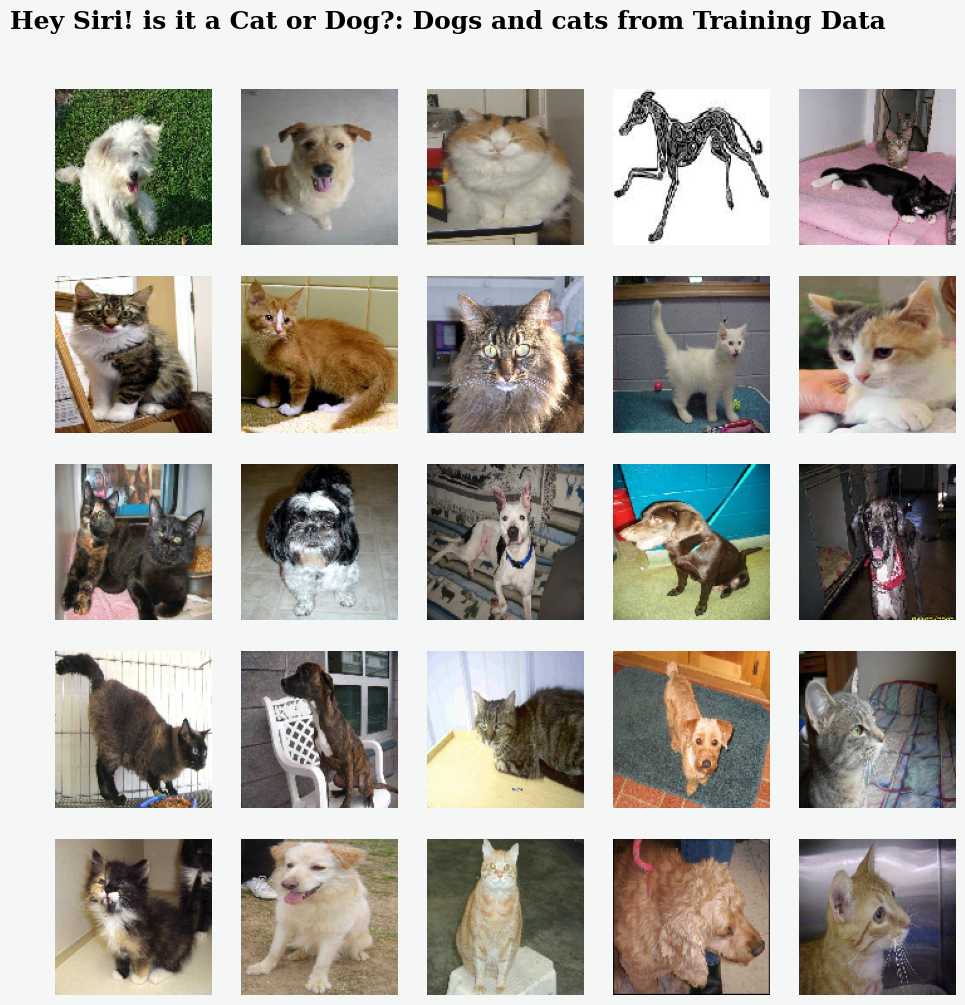

In [ ]:
showImages(visual_df,5,5, name = 'Dogs and Cat', subtitle = 'off')

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets split data into training and validation dataset, and visualize the data distribution...</p>

In [ ]:
train_image_df

filename category
0       cat.2877.jpg      cat
1       dog.2011.jpg      dog
2       cat.3647.jpg      cat
3       dog.7264.jpg      dog
4        dog.356.jpg      dog
...              ...      ...
24995   cat.1551.jpg      cat
24996  dog.11132.jpg      dog
24997   cat.9073.jpg      cat
24998   cat.4398.jpg      cat
24999   cat.2264.jpg      cat

[25000 rows x 2 columns]

In [ ]:
# Data split into train data and validation data
train_valid_df, test_df = train_test_split(train_image_df, test_size = 0.04) # train_image_df -> train_valid: 0.96, test: 0.04 분할
                                                                             # 25,000         -> 24,000             1,000
train_df, valid_df = train_test_split(train_valid_df, test_size = 0.2)       # train_valid    -> train: 0.8, valid: 0.2 분할
                                                                             # 24,000         -> 19,200       4,800
train_images = train_df.shape[0]  # 19,200
valid_images = valid_df.shape[0]  #  4,800
holdon_images = test_df.shape[0]  #  1,000
test_images = submission_image_df.shape[0]  # 12,500 (test_dir에 있는 파일의 갯수)

print('\n'+color.BOLD_COLOR + 'Number of Training Images: ' + color.END + color.BOLD+ str(train_images)+ color.END)
print('\n'+color.BOLD_COLOR +  'Number of Validating Images: ' + color.END + color.BOLD+ str(valid_images)+ color.END)
print( '\n'+color.BOLD_COLOR +  'Number of Holdon Images: ' + color.END +  color.BOLD+ str(holdon_images)+ color.END)
print('\n'+color.BOLD_COLOR + 'Number of Testing Images: ' + color.END +  color.BOLD+str(test_images)+ color.END)



Number of Training Images: 19200

Number of Validating Images: 4800

Number of Holdon Images: 1000

Number of Testing Images: 12500


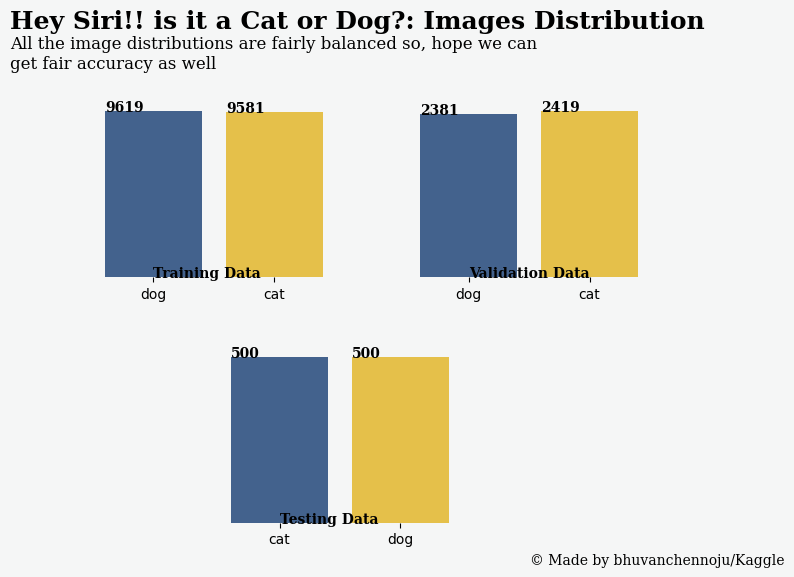

In [ ]:
fig = plt.figure(figsize =(8,8), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')
gs = fig.add_gridspec(10,10)         # 비대칭 축공간을 만들때 사용

ax0 = fig.add_subplot(gs[2:5,1:5])
ax1 = fig.add_subplot(gs[2:5,6:10])
ax2 = fig.add_subplot(gs[6:9,3:7])


axes = [ax0,ax1,ax2]
data  = [train_df['category'], valid_df['category'], test_df['category']]
labels = ['Training Data','Validation Data','Testing Data']

# 타이틀 텍스트 & 폰트설정 등 그래프 꾸미는 작업
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.axes.get_yaxis().set_visible(False)
    
    for loc in ['left','right','top','bottom']:
        ax.spines[loc].set_visible(False)
    
for ax,df, label in zip(axes,data,labels):
    sns.countplot(df, ax = ax, palette = [colors[2],colors[3]], alpha =1)
    ax.set_xlabel(xlabel = ' ')
    for pa in ax.patches: 
        ax.text(pa.get_x(), pa.get_height(),'{}'.format(pa.get_height()), **{'fontfamily':'serif', 'size':10, 'weight':'bold'}, alpha = 1)

    ax.text(0,0,label,**{'fontfamily':'serif', 'size':10, 'weight':'bold'})

fig.text(0.1,0.82, 'Hey Siri!! is it a Cat or Dog?: Images Distribution',{'fontfamily':'serif','size':18,'weight':'bold'})
fig.text(0.1,0.77, '''All the image distributions are fairly balanced so, hope we can
get fair accuracy as well''',{'fontfamily':'serif','size':12,})

fig.text(0.75,0.15,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
fig.show()

<a id = '4.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >4. Classification with Vanilla CNN</h2> 

Our datasets are evenly distributed. In this notebook, for the first benchmark model I will use a pretrained model and it can further improved upon. 
Since, our task is similar to ImageNet challenge with 2 class classification any pretrained model from [keras applcations](https://keras.io/api/applications/) can be used.
Moreover, it's is not that practical to achieve a higher accurarcy with a custom build cnn from scartch. 

let's get started with a simple vanila network without data augmentation (shown in figure below) first to see how good it can perform. Later, we will move towards other techniques.



<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" > Let prepared training, validation, testing data for vanilla CNN without any agumentations...</p>

In [ ]:
img_size = 224
batch_size = 128

print(color.BOLD_COLOR + '\nPreparing train and validation images for training...' + color.END)

# 데이터 증식없이
# dataframe iterators without data agumnetation
train_map = ImageDataGenerator()
valid_map = ImageDataGenerator()
test_map =  ImageDataGenerator()

print(color.BOLD)

# Creatinga a dataframe iterators for fitting
vani_train_data = train_map.flow_from_dataframe(
            train_df,train_dir,
            x_col = 'filename',
            y_col = 'category',
            target_size = (img_size, img_size),   # img size: 224 x 224
            batch_size = batch_size,              # batch_size: 128
            class_mode = 'categorical')

vani_valid_data = valid_map.flow_from_dataframe(
             valid_df, train_dir,
             x_col = 'filename',
             y_col = 'category',
             target_size = (img_size, img_size),
             batch_size = batch_size,
             class_mode = 'categorical')


vani_test_data = test_map.flow_from_dataframe(
             test_df, train_dir,
             x_col = 'filename',
             y_col = None,
             target_size = (img_size, img_size),
             batch_size = batch_size,
             class_mode = None,
             shuffle = False)

print(color.BOLD_COLOR + '\nDone!')


Preparing train and validation images for training...

Found 19200 validated image filenames belonging to 2 classes.
Found 4800 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames.

Done!


<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets build vanila CNN model ...</p>

In [ ]:
#Building model computational graph
vani_model = Sequential()

# Feature Extractor
vani_model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)))
vani_model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same')) 
vani_model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))            

vani_model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

vani_model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

vani_model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

vani_model.add(Dropout(0.3))

vani_model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

vani_model.add(Dropout(0.3))

# Classifier
vani_model.add(Flatten())
vani_model.add(Dense(512, activation = 'relu'))
vani_model.add(Dropout(0.5))
vani_model.add(Dense(2, activation = 'softmax'))   # cat or dog

print(color.BOLD_COLOR + '\nVanilla Model layers and output shapes with params...\n'+color.END)

print(color.BOLD)
vani_model.summary()


Vanilla Model layers and output shapes with params...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets See vanila CNN model Schematic diagram ...</p>

[모델 시각화하기](https://keras.io/ko/visualization/)  
`plot_model`을 이용해서 `Sequential()`로 구성한 신경망 모델을 시각화하기  

- 매개변수
    - **model  :**  A Keras model instance
    - **to_file  :** File name of the plot image.
    - **show_shapes :** layer shape을 나타낼 것인지 (디폴트값은 False)
    - **show_layer_names  :** layer name을 나타낼 것인지 (디폴트값은 True)
    - **expand_nested  :**  중첩된 모델을 그래프상에서 클러스터로 확장할 것인지 (디폴트값은 False)
    - **dpk  :** 이미지 dpi를 조정 (디폴트값은 96)


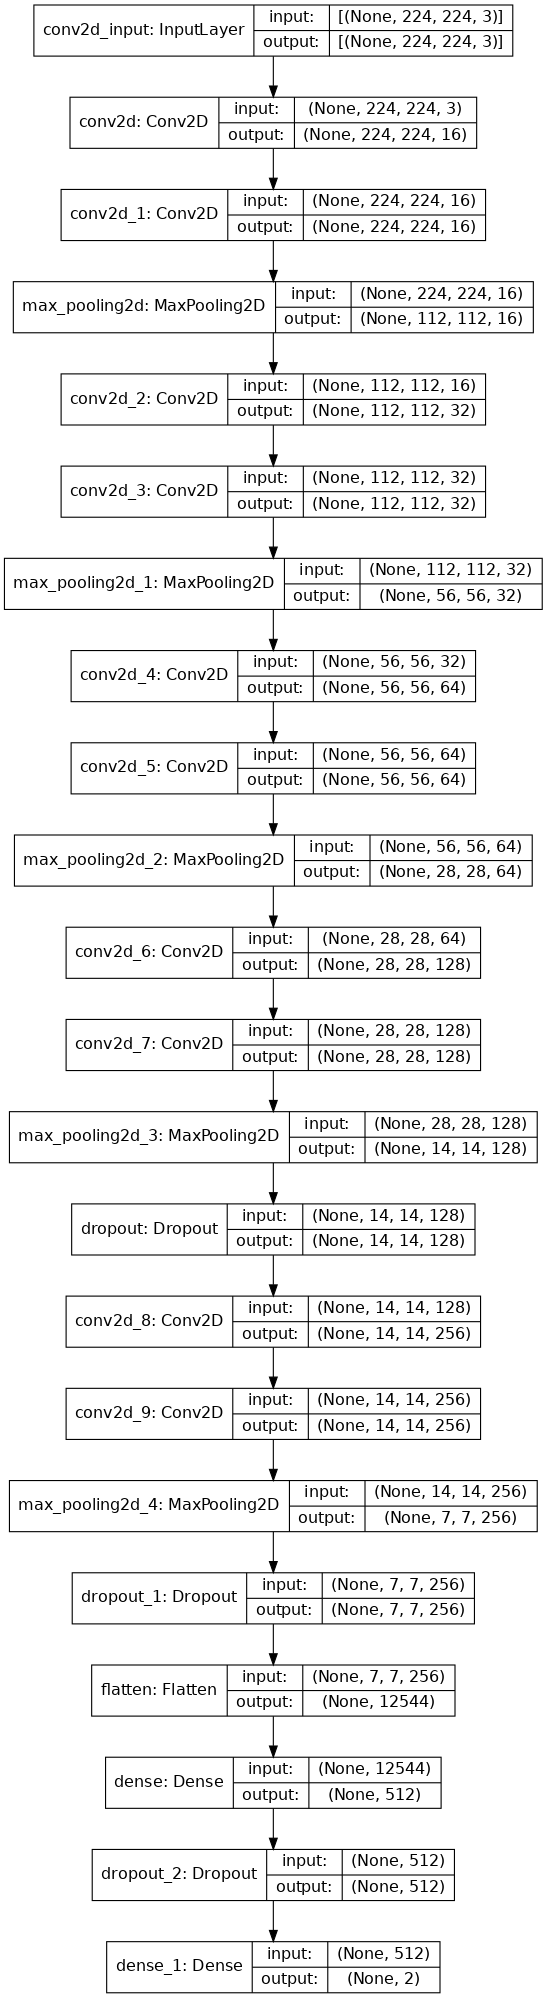

In [ ]:
plot_model(vani_model, to_file='vani_model.png', show_shapes = True, expand_nested = True, dpi = 80)
#SVG(model_to_dot(vani_model).create(prog='dot', format='svg'))

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets train and validate on vanila CNN model ...</p>

In [ ]:
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate= 0.0001,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

vani_model.compile(loss = loss, optimizer = opt, metrics = metrics)

print(color.BOLD_COLOR + 'Training on Vanilla CNN has started ....\n'+ color.END)
print(color.BOLD)

Training on Vanilla CNN has started ....




In [ ]:
# fitting the model for training dataset
vani_history = vani_model.fit(vani_train_data, epochs = 15,
                          validation_data = vani_valid_data,           # validation_data  = 4,800
                          validation_steps= valid_images//batch_size,  # validation_stpes = 4,800//128 = 37
                          steps_per_epoch= train_images//batch_size)   # steps_per_epoch  = 19,200//128 = 150

print(color.END)
print(color.BOLD_COLOR + '\nDone!\n'+ color.END)


Epoch 1/15
150/150 [==============================] - 173s 1s/step - loss: 1.5805 - accuracy: 0.5163 - val_loss: 0.6518 - val_accuracy: 0.6643
Epoch 2/15
150/150 [==============================] - 160s 1s/step - loss: 0.6385 - accuracy: 0.6201 - val_loss: 0.5668 - val_accuracy: 0.7137
Epoch 3/15
150/150 [==============================] - 160s 1s/step - loss: 0.5702 - accuracy: 0.6990 - val_loss: 0.5757 - val_accuracy: 0.6864
Epoch 4/15
150/150 [==============================] - 160s 1s/step - loss: 0.5261 - accuracy: 0.7388 - val_loss: 0.4710 - val_accuracy: 0.7827
Epoch 5/15
150/150 [==============================] - 161s 1s/step - loss: 0.4783 - accuracy: 0.7733 - val_loss: 0.4860 - val_accuracy: 0.7625
Epoch 6/15
150/150 [==============================] - 161s 1s/step - loss: 0.4465 - accuracy: 0.7918 - val_loss: 0.4292 - val_accuracy: 0.8076
Epoch 7/15
150/150 [==============================] - 160s 1s/step - loss: 0.4088 - accuracy: 0.8131 - val_loss: 0.3739 - val_accuracy: 0.8364

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets plot vanila CNN model change in loss and accuracys with epochs ...</p>

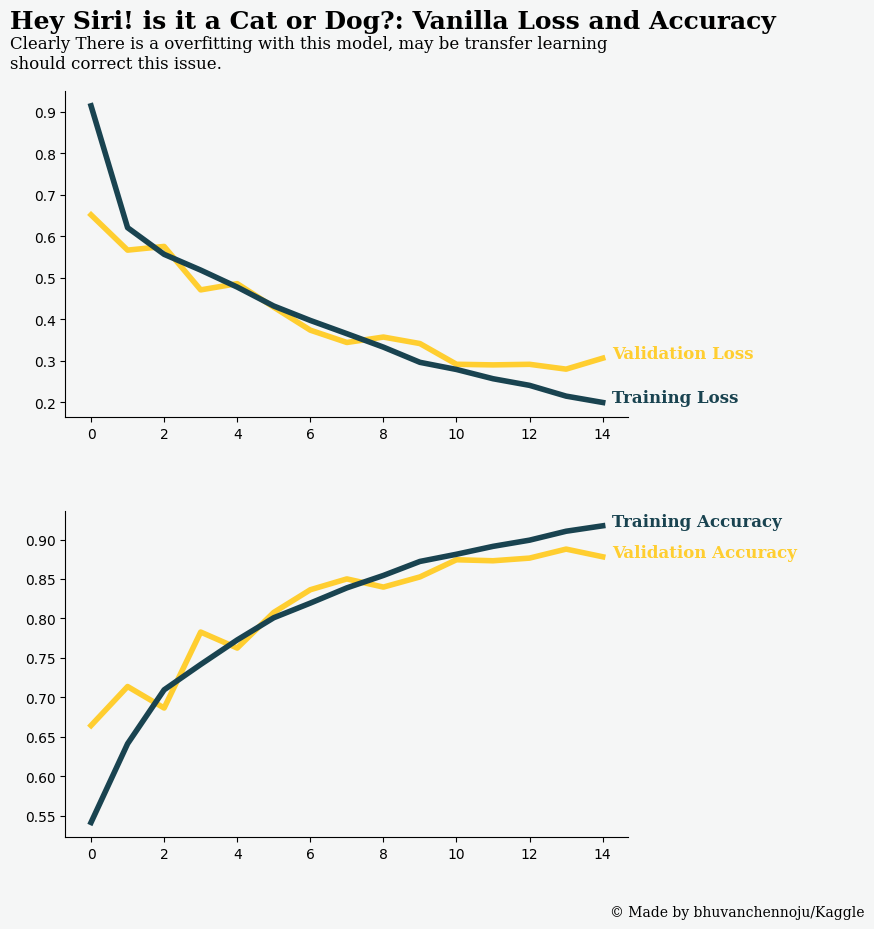

In [ ]:
fig,ax  = plt.subplots(2,1, figsize =(8,8), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')

axes  = ax.ravel()  # 평탄화

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right','top',]:
        ax.spines[loc].set_visible(False)
        
hist1 = vani_history.history
Epochs =  range(len(hist1['loss']))

## loss plot
sns.lineplot(x = Epochs, y = hist1['val_loss'],  ax = axes[0], linewidth = 4, color = colors[3])
sns.lineplot(x = Epochs, y = hist1['loss'], ax  = axes[0], linewidth =4,  color = colors[4])


axes[0].text(Epochs[-1]+0.25,hist1['val_loss'][-1],'Validation Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[3]})
axes[0].text(Epochs[-1]+0.25,hist1['loss'][-1] ,'Training Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[4]})


# accuracy plot
sns.lineplot(x = Epochs, y = hist1['val_accuracy'],ax = axes[1],linewidth = 4, color = colors[3])
sns.lineplot(x = Epochs, y = hist1['accuracy'],ax = axes[1],linewidth =4,  color = colors[4])
axes[1].text(Epochs[-1]+0.25,hist1['val_accuracy'][-1],'Validation Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[3]})
axes[1].text(Epochs[-1]+0.25,hist1['accuracy'][-1] ,'Training Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[4]})


fig.text(0,1.06, 'Hey Siri! is it a Cat or Dog?: Vanilla Loss and Accuracy ',{'fontfamily':'serif', 'size':18, 'weight':'bold'})
fig.text(0,1.01, '''Clearly There is a overfitting with this model, may be transfer learning
should correct this issue.''',{'fontfamily':'serif', 'size':12})
        
fig.text(0.75,-0.05,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.tight_layout(h_pad = 5)

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets see vanila CNN predictions with confusion matrix ...</p>

In [ ]:
# test data에 대한 예측값을 vani_pred에 저장
vani_pred = vani_model.predict_generator(vani_test_data)

test_df['vani_pred'] = np.argmax(vani_pred, axis = -1)  # 예측값 중 최대값을 vani_pred열의 value로 저장

# 파일 이름 가져오기
labels = dict((v,k) for k,v in vani_train_data.class_indices.items())

# test_df['vani_pred'] 값(예측값 중 최대값)을 labels로 대체
test_df['vani_pred'] = test_df['vani_pred'].map(labels) 


# -----✨여기서부터 제대로 뜯어보기✨-----

In [ ]:
# confusion matrix 만드는 함수
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('#f5f6f6')
    sns.heatmap(cf,annot=box_labels,fmt="",linewidths = 1,square = True,linecolor= '#f5f6f6',
                cmap=cmap,cbar=cbar,annot_kws={'fontfamily':'serif','size':18,'weight':'bold'},
                xticklabels=categories,
                yticklabels=categories,)

    if xyplotlabels:
        plt.ylabel('True label', **{'fontfamily':'serif','size':12,'weight':'bold'})
        plt.xlabel('Predicted label' + stats_text,**{'fontfamily':'serif','size':12,'weight':'bold'})
    else:
        plt.xlabel(stats_text,**{'fontfamily':'serif','size':12,'weight':'bold'})
    
    plt.gca().set_xticklabels(categories, {'fontfamily':'serif','size':16,'weight':'bold'})
    plt.gca().set_yticklabels(categories, {'fontfamily':'serif','size':16,'weight':'bold'})

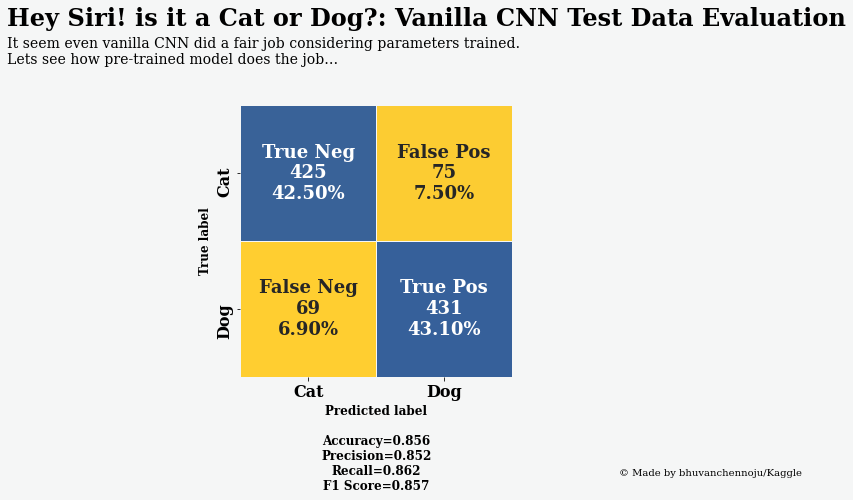

In [ ]:
vani_cf_matrix = confusion_matrix(test_df['category'],test_df['vani_pred'])
my_cols = [colors[3],colors[2]]

labels = [ 'True Neg','False Pos','False Neg','True Pos']
categories = ['Cat', 'Dog']
make_confusion_matrix(vani_cf_matrix,figsize = (10,5),
                      group_names=labels,cbar = False,cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",my_cols),
                      categories=categories, 
                      title = 'Vanila CNN comfusion matrix')

plt.gcf().text(0,1.1,'Hey Siri! is it a Cat or Dog?: Vanilla CNN Test Data Evaluation',{'fontfamily':'serif', 'size':24,  'color':'black', 'weight':'bold'})
plt.gcf().text(0,0.995,"""It seem even vanilla CNN did a fair job considering parameters trained.
Lets see how pre-trained model does the job...""",{'fontfamily':'serif', 'size':14,  'color':'black', })

plt.gcf().text(0.85,-0.15,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.gcf().show()


<a id = '5.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >5. Data Agumentation, Early Stopping, Learning Rate Schedule</h2> 

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" > Lets code helper function for visualization of image agumentation...</p>

In [ ]:
print(color.BOLD +'\n'+'Helper funtions for Image Agumentation visualizations' +'\n'+color.END)

# 데이터 증식 결과를 시각화해서 보여주는 함수
def data_argumentation_show(n, grid_size):  # n: 샘플 갯수 , grid_size: 시각화 할 grid size
    sample_aug_map = ImageDataGenerator(
            zoom_range = 0.1,
            rotation_range = 25,
            horizontal_flip = True,
            height_shift_range =0.2,
            width_shift_range = 0.2,
            fill_mode='nearest',
            rescale = 1/255)
    sample_data = sample_aug_map.flow_from_dataframe(
            (train_df.sample(n)),
            train_dir,
            x_col = 'filename',
            y_col = 'category',
            target_size = (img_size, img_size),
            class_mode = 'categorical')
  
  #subplot grid 
    fig = plt.figure(figsize = (10,10))
    fig.patch.set_facecolor('#f5f6f6')
    for i in range(0,grid_size*grid_size):
        plt.subplot(grid_size,grid_size, i+1)
        for x,y in sample_data:
            img = x[0]
            plt.imshow(img)
            plt.axis('off')
            break
            plt.tight_layout()
    fig.show()

     
    fig.text(0.1,0.93, 'Hey Siri! is it cat or dog?: Image agumentation',{'fontfamily':'serif','size':20,'weight':'bold'})
    
    return None




Helper funtions for Image Agumentation visualizations



Found 1 validated image filenames belonging to 1 classes.


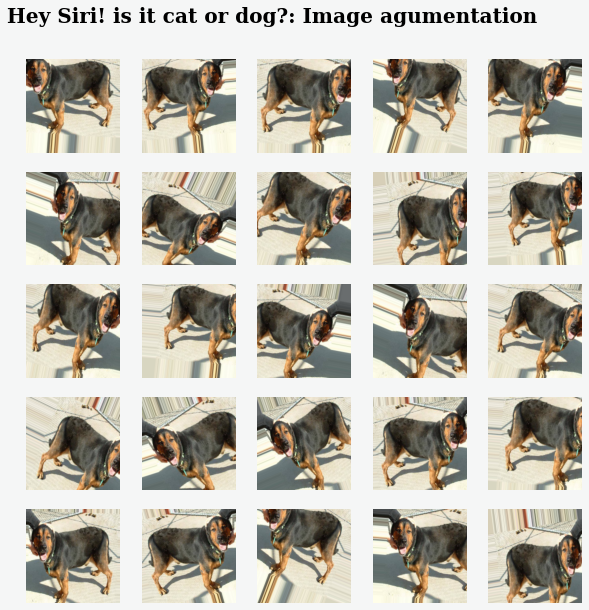

In [ ]:
# To visulalize the effect of data argumentation 
#select number of samples to argument----> n = 
# total number of argumentation is grid_Size**2

data_argumentation_show(1, 5)

Found 2 validated image filenames belonging to 2 classes.


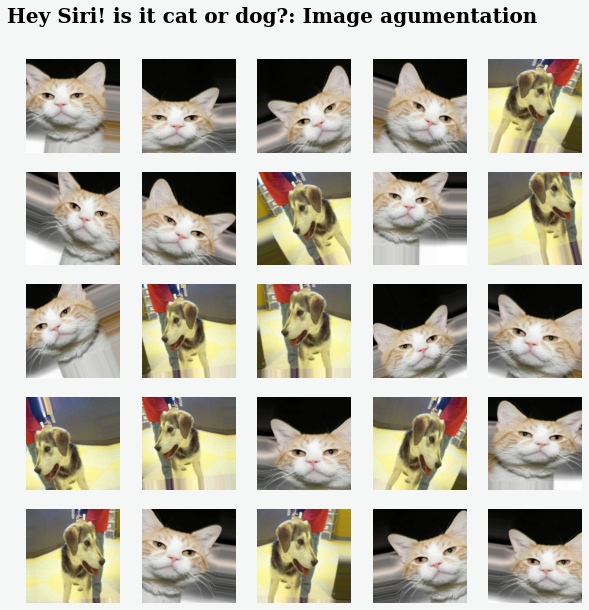

In [ ]:
data_argumentation_show(2, 5)

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" > Decaying learing rate setting function...</p>

In [ ]:
print(color.BOLD + '\nSetting a decay learning rate for learning rate schedule\n'+ color.END)

# 학습률 조절을 위한 매개변수 정의
epoch = 50
learning_rate = 3e-5 
lr_start = 0.00000001
lr_min = 0.000001
lr_max = 3e-5 
lr_rampup_epochs = 1
lr_sustain_epochs = 1
lr_exp_decay = .8

# 학습률을 자동으로 조정해주는 함수
# Learning Rate Scheduler
def lrfn(epoch):
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
    return lr
    
print(color.BOLD_COLOR + 'Done!' +color.END)



Setting a decay learning rate for learning rate schedule

Done!


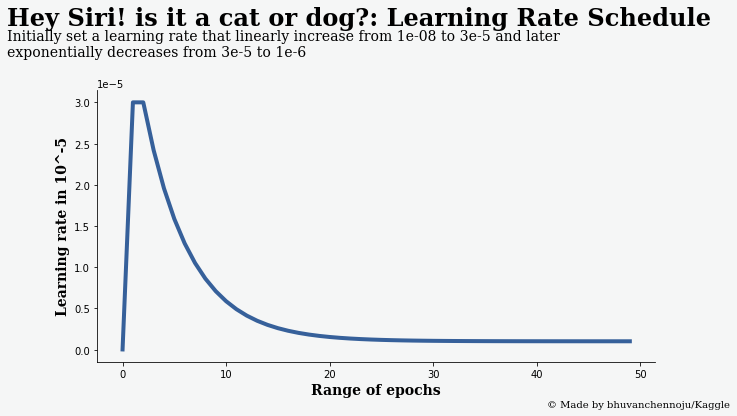

In [ ]:
epochs = 20
epochs_range = [i for i in range(50 if epochs<50 else epochs)]
learn_rate = [lrfn(x) for x in epochs_range]


fig,ax = plt.subplots(figsize = (10,5))
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')

for loc in ['right','top',]:
    ax.spines[loc].set_visible(False)

ax.plot(epochs_range, learn_rate, linewidth = 4, color= colors[2]) 
plt.xlabel('Range of epochs',{'fontfamily':'serif', 'size':14,  'color':'black', 'weight':'bold'})
plt.ylabel('Learning rate in 10^-5',{'fontfamily':'serif', 'size':14,  'color':'black', 'weight':'bold'})


plt.gcf().text(0,1.06,'Hey Siri! is it a cat or dog?: Learning Rate Schedule',{'fontfamily':'serif', 'size':24,  'color':'black', 'weight':'bold'})
plt.gcf().text(0,0.975,"""Initially set a learning rate that linearly increase from 1e-08 to 3e-5 and later
exponentially decreases from 3e-5 to 1e-6""",{'fontfamily':'serif', 'size':14,  'color':'black', })

plt.gcf().text(0.75,0,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.gcf().show()

<a id = '6.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >6. Classification with ResNet50</h2> 

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" > Image agumentation data preparation with ImageDataGenerator</p>

In [ ]:
print(color.BOLD_COLOR + '\n Agumenting Train, Validation images... and testing images just passing through... \n'+ color.END)

print(color.BOLD)

# train 데이터 증식
# using standard data augumentation
train_aug_map = ImageDataGenerator(
                    rotation_range=10,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    preprocessing_function = preprocess_input)
res_train_data = train_aug_map.flow_from_dataframe(
            train_df, train_dir,
            x_col = 'filename',
            y_col = 'category',
            target_size = (img_size, img_size),
            batch_size = batch_size,
            class_mode = 'categorical')

# one should validate the generality of model on the actcual target images
# so not supposed agumentation
valid_aug_map = ImageDataGenerator(preprocessing_function = preprocess_input)

res_valid_data = valid_aug_map.flow_from_dataframe(
             valid_df, train_dir,
             x_col = 'filename',
             y_col = 'category',
             target_size = (img_size, img_size),
             batch_size = batch_size,
             class_mode = 'categorical')


#test data rescaling images
test_aug_map = ImageDataGenerator(preprocessing_function = preprocess_input)

res_test_data = test_aug_map.flow_from_dataframe(
             test_df, train_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)
           



 Agumenting Train, Validation images... and testing images just passing through... 


Found 19200 validated image filenames belonging to 2 classes.
Found 4800 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames.


<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" > Building model for transfer learning on top of pretrained ResNet50 Model...</p>

In [ ]:
# loading ResNet 
resNet = tf.keras.applications.ResNet50(weights = 'imagenet',
                        include_top = False,
                        input_shape = (224,224, 3))

resNet.trainable = False  # Freeze layers
resNet_model = Sequential([
        resNet,
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.4),
        Dense(2, activation = 'softmax')])
     

optimizer = optimizers.Adam(1e-5)

print(color.BOLD_COLOR + '\nResNet based Transfer learning Model layers and output shapes with params...\n'+color.END)

print(color.BOLD)
resNet_model.summary()
#plot_model(resNet_model, to_file='resNet_model.png')

94773248/94765736 [==============================] - 1s 0us/step

ResNet based Transfer learning Model layers and output shapes with params...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 126,351,234
Trainable params: 102,763,522
Non-trainable params: 23,587,712
__________________

In [ ]:
print(color.BOLD + '\nSetting early stopping factor and learning rate schedule\n' +color.END)

earlystop = EarlyStopping(patience= 5)
    
lr_callback = LearningRateScheduler(lrfn, verbose = True)

callbacks = [earlystop, lr_callback]
print(color.BOLD_COLOR + 'Done!')


Setting early stopping factor and learning rate schedule

Done!


<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets train and validate Pre-trained ResNet50 model for top layers...</p>

In [ ]:
resNet_model.compile(optimizer = optimizer,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

print(color.BOLD_COLOR + 'Training on ResNet50 has started ....\n'+ color.END)
print(color.BOLD)

resnet_history = resNet_model.fit_generator(res_train_data, epochs = 15,
                          validation_data = res_valid_data,
                          validation_steps= valid_images//batch_size,
                          steps_per_epoch= train_images//batch_size,
                          callbacks = callbacks)
print(color.END)
print(color.BOLD_COLOR + 'Done!\n'+ color.END)

Training on ResNet50 has started ....


Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-08.
150/150 [==============================] - 245s 2s/step - loss: 2.1797 - accuracy: 0.4864 - val_loss: 1.7122 - val_accuracy: 0.4939
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 3e-05.
150/150 [==============================] - 242s 2s/step - loss: 0.9276 - accuracy: 0.9022 - val_loss: 0.0681 - val_accuracy: 0.9869
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 3e-05.
150/150 [==============================] - 241s 2s/step - loss: 0.0590 - accuracy: 0.9847 - val_loss: 0.0526 - val_accuracy: 0.9863
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 2.4200000000000002e-05.
150/150 [==============================] - 242s 2s/step - loss: 0.0372 - accuracy: 0.9863 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 1.9560000000000006e-05

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets plot Resnet models change in loss and accuracys with epochs ...</p>

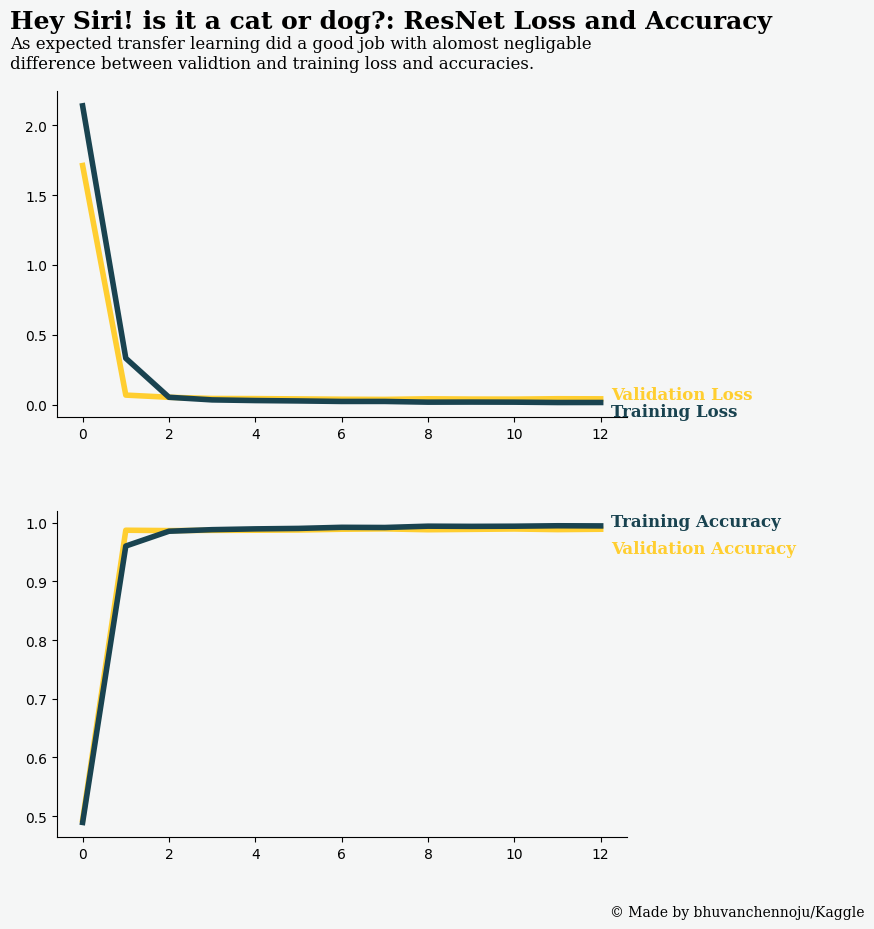

In [ ]:
fig,ax  = plt.subplots(2,1, figsize =(8,8), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')

axes  = ax.ravel()

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right','top',]:
        ax.spines[loc].set_visible(False)
        
hist2 = resnet_history.history
Epochs =  range(len(hist2['loss']))

## loss plot
sns.lineplot(x = Epochs, y = hist2['val_loss'],  ax = axes[0], linewidth = 4, color = colors[3])
sns.lineplot(x = Epochs, y = hist2['loss'], ax  = axes[0], linewidth =4,  color = colors[4])


axes[0].text(Epochs[-1]+0.25,hist2['val_loss'][-1],'Validation Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[3]})
axes[0].text(Epochs[-1]+0.25,hist2['loss'][-1]-0.1 ,'Training Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[4]})


# accuracy plot
sns.lineplot(x = Epochs, y = hist2['val_accuracy'],ax = axes[1],linewidth = 4, color = colors[3])
sns.lineplot(x = Epochs, y = hist2['accuracy'],ax = axes[1],linewidth =4,  color = colors[4])
axes[1].text(Epochs[-1]+0.25,hist2['val_accuracy'][-1]-0.04,'Validation Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[3]})
axes[1].text(Epochs[-1]+0.25,hist2['accuracy'][-1] ,'Training Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':colors[4]})


fig.text(0,1.06, 'Hey Siri! is it a cat or dog?: ResNet Loss and Accuracy ',{'fontfamily':'serif', 'size':18, 'weight':'bold'})
fig.text(0,1.01, '''As expected transfer learning did a good job with alomost negligable
difference between validtion and training loss and accuracies.''',{'fontfamily':'serif', 'size':12})
fig.text(0.75,-0.05,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
        
plt.tight_layout(h_pad = 5)

fig.show()

<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets see ResNet predictions with confusion matrix ...</p>

In [ ]:
res_pred = resNet_model.predict_generator(res_test_data)
test_df['res_pred'] = np.argmax(res_pred, axis = -1)
labels = dict((v,k) for k,v in res_train_data.class_indices.items())

test_df['res_pred'] = test_df['res_pred'].map(labels)


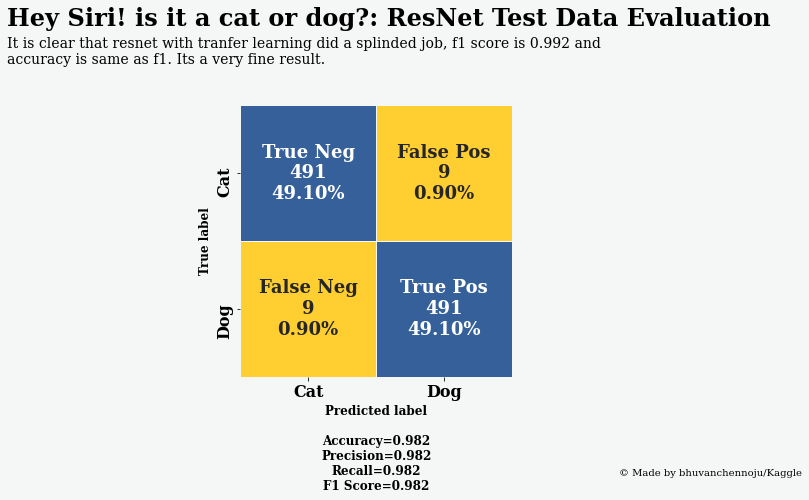

In [ ]:
res_cf_matrix = confusion_matrix(test_df['category'],test_df['res_pred'])
my_cols = [colors[3],colors[2]]

labels = [ 'True Neg','False Pos','False Neg','True Pos']
categories = ['Cat', 'Dog']
make_confusion_matrix(res_cf_matrix,figsize = (10,5),
                      group_names=labels,cbar = False,cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",my_cols),
                      categories=categories, 
                      title = 'Vanila CNN comfusion matrix')

plt.gcf().text(0,1.1,'Hey Siri! is it a cat or dog?: ResNet Test Data Evaluation',{'fontfamily':'serif', 'size':24,  'color':'black', 'weight':'bold'})
plt.gcf().text(0,0.995,"""It is clear that resnet with tranfer learning did a splinded job, f1 score is 0.992 and 
accuracy is same as f1. Its a very fine result.""",{'fontfamily':'serif', 'size':14,  'color':'black', })

plt.gcf().text(0.85,-0.15,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.gcf().show()

<a id = '7.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >7. Final predictions on Test Set</h2> 

In [ ]:
print(color.BOLD_COLOR + '\n Final test data preperation for both vanilla and resnet for final predictions \n'+ color.END)
# generating an dataframe iterator for test dataset

print(color.BOLD)
vani_sub_aug_map = ImageDataGenerator()
res_sub_aug_map = ImageDataGenerator(preprocessing_function = preprocess_input)

vani_sub_data = vani_sub_aug_map.flow_from_dataframe(
             submission_image_df, test_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)


res_sub_data = res_sub_aug_map.flow_from_dataframe(
             submission_image_df, test_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)


 Final test data preperation for both vanilla and resnet for final predictions 


Found 12500 validated image filenames.
Found 12500 validated image filenames.


In [ ]:
print(color.BOLD_COLOR + '\n Making final predictions with both resnet and vanilla cnns for Test data'+color.END)
vani_pred_sub = vani_model.predict_generator(vani_sub_data)
submission_image_df['vani_pred_sub'] = np.argmax(vani_pred_sub, axis = -1)
labels = dict((v,k) for k,v in res_train_data.class_indices.items())
submission_image_df['vani_pred_sub'] = submission_image_df['vani_pred_sub'].map(labels)


res_pred_sub = resNet_model.predict_generator(res_sub_data)
submission_image_df['res_pred_sub'] = np.argmax(res_pred_sub, axis = -1)
labels = dict((v,k) for k,v in res_train_data.class_indices.items())
submission_image_df['res_pred_sub'] = submission_image_df['res_pred_sub'].map(labels)

print(color.BOLD)
print(submission_image_df.head())


 Making final predictions with both resnet and vanilla cnns for Test data

    filename vani_pred_sub res_pred_sub
0   8000.jpg           cat          cat
1   1831.jpg           cat          dog
2    918.jpg           cat          dog
3   7077.jpg           cat          dog
4  11036.jpg           cat          dog


<p style = "font-size: 25px; font-style: normal;color : #36609A;font-weight:bold" >Lets see how our predictions are done on Test Data by both networks...</p>

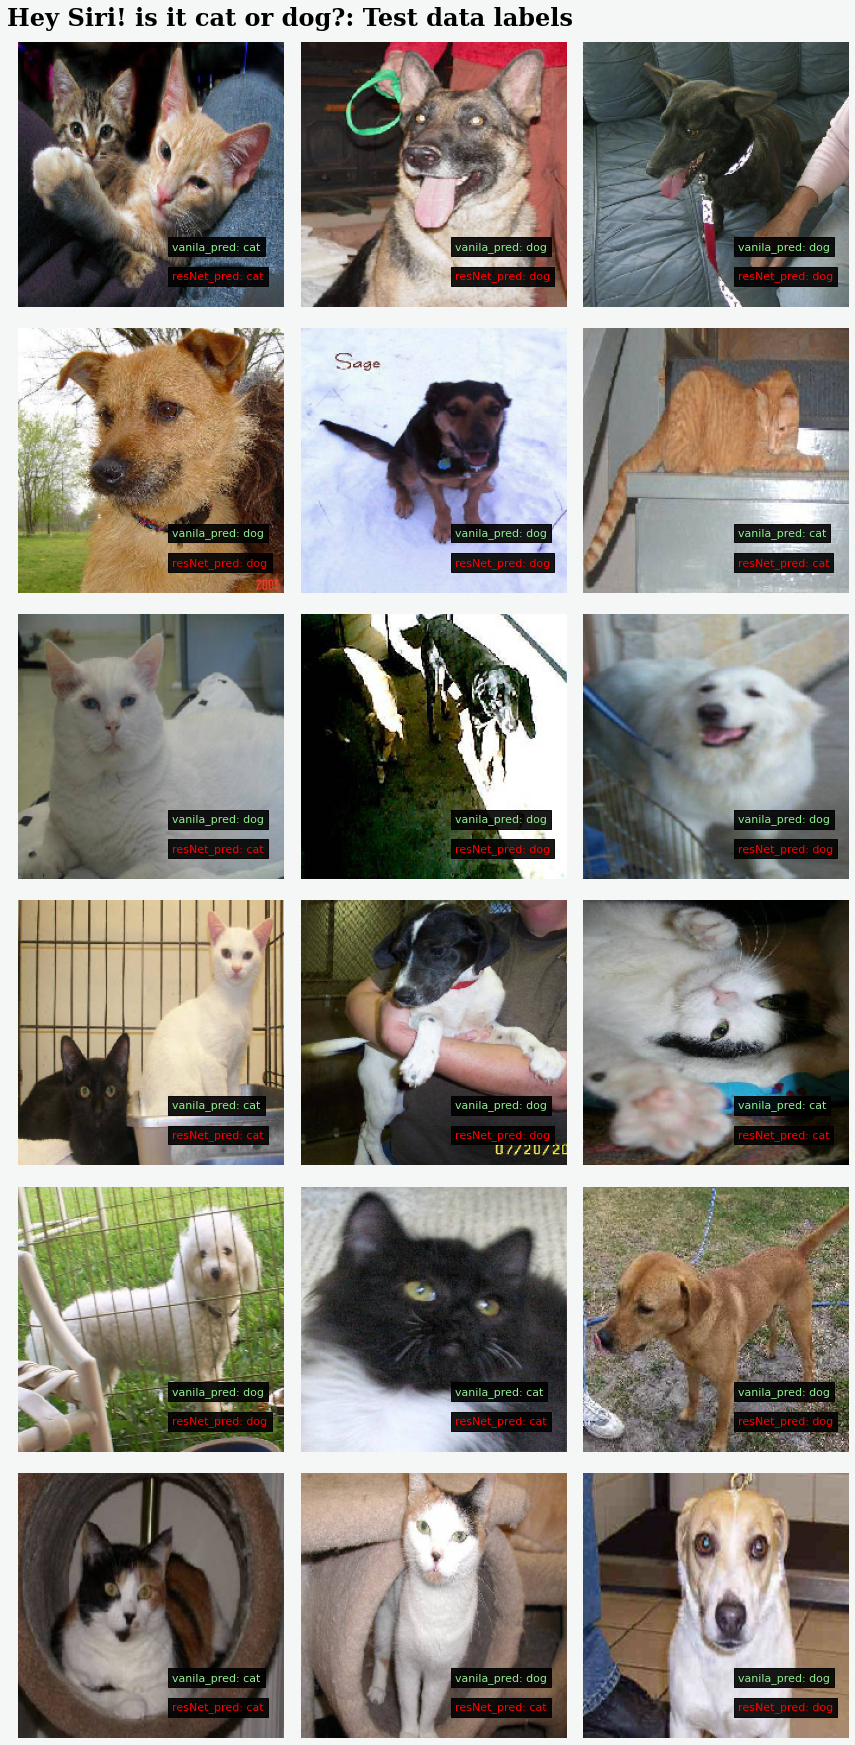

In [ ]:
pred_sample = submission_image_df.sample(18)
pred_sample.reset_index(drop = True, inplace = True)

fig = plt.figure(figsize=(12,24))
fig.patch.set_facecolor('#f5f6f6')

for index, row in pred_sample.iterrows():
    filename = row['filename']
    vani_pred = row['vani_pred_sub']
    res_pred = row['res_pred_sub']
    img = load_img( test_dir + filename, target_size= (img_size, img_size))
    plt.subplot(6,3, index+1)
    plt.imshow(img)
    plt.gca().axis('off')
    plt.text(130, 175, 'vanila_pred: {}'.format(vani_pred), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(130, 200, 'resNet_pred: {}'.format(res_pred), color='red',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    #plt.title(filename.split('.')[0])

plt.tight_layout()
#plt.subplots_adjust( wspace=0, hspace= 1)
fig.text(0,1, 'Hey Siri! is it cat or dog?: Test data labels',{'fontfamily':'serif','size':24,'weight':'bold'})
fig.show()
   

<a id = '8.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >8. Summary</h2> 

<p style = "font-size: 30px; font-style: normal;color : #36609A;font-weight:bold" >What happened so far?</p>

So far, I have tried to build a cat and dog classifier with help of deeplearning models, lets see the steps 
<ol>
    <li>Data processing and visualization</li>
    <li>Build a basic CNN and make prections</li>
    <li>Explored Data Agumentation and Learning rate Schedule</li>
    <li>Build a Resnet based Transfer leraning model and make prections</li>
    <li>final comparision of both models results</li>
</ol>

<p style = "font-size: 30px; font-style: normal;color : #36609A;font-weight:bold" >Thank you so much for reading all the way here.....Hope you enjoyed my work.....!!! I am open to suggetions. Please do comment if you any advice or critical comments... Thanks again!!!</p>